<a href="https://colab.research.google.com/github/poandpo/wanted_pre_onboarding/blob/main/%EC%9B%90%ED%8B%B0%EB%93%9C_%ED%94%84%EB%A6%AC%EC%98%A8%EB%B3%B4%EB%94%A9_%EC%BD%94%EC%8A%A4pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 과제 안내

- 아래 설명에 따라 코드의 빈칸을 채워 Tokenizer(문제 1)와 TfidfVectorizer(문제 2) 클래스를 완성하세요.
    - 문제 1, 문제 2 모두 수행해야 합니다.
    - 주어진 조건을 모두 만족해야 합니다.
- 작업한 파일을 하나의 GitHub Repository에 담아서 제출하세요.
    - 파일 형식: `.ipynb`
        - `.ipynb` 파일 하나에 문제 1과 문제 2 작업 결과를 모두 담아 주시기 바랍니다.
    - 링크 제출 전 해당 GitHub Repository가 public으로 설정되어 있는지 확인 바랍니다.
        - private으로 설정 시 제출 확인이 불가합니다.

https://codestates.notion.site/_AIB-8aaa720522d0496bb80a707f32dc7411        

### **문제 1) Tokenizer 생성하기**
**1-1. `preprocessing()`**

텍스트 전처리를 하는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output: 각 문장을 토큰화한 결과로, nested list 형태입니다. ex) [['i', 'go', 'to', 'school'], ['i', 'like', 'pizza']]
- 조건 1: 입력된 문장에 대해서 소문자로의 변환과 특수문자 제거를 수행합니다.
- 조건 2: 토큰화는 white space 단위로 수행합니다.
    
    

**1-2. `fit()`**

어휘 사전을 구축하는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- 조건 1: 위에서 만든 `preprocessing` 함수를 이용하여 각 문장에 대해 토큰화를 수행합니다.
- 조건 2: 각각의 토큰을 정수 인덱싱 하기 위한 어휘 사전(`self.word_dict`)을 생성합니다.
    - 주어진 코드에 있는 `self.word_dict`를 활용합니다.
    

**1-3. `transform()`**

어휘 사전을 활용하여 입력 문장을 정수 인덱싱하는 함수입니다.

- input: 여러 영어 문장이 포함된 list입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output: 각 문장의 정수 인덱싱으로, nested list 형태입니다. ex) [[1, 2, 3, 4], [1, 5, 6]]
- 조건 1: 어휘 사전(`self.word_dict`)에 없는 단어는 'oov'의 index로 변환합니다.

In [3]:
import re

class Tokenizer():
  def __init__(self):
    self.word_dict = {'oov': 0}
    self.fit_checker = False
  
  def preprocessing(self, sequences):
    result = []
    for i in range(len(sequences)):
      tok = re.sub(r"[^a-zA-Z0-9 ]", "", sequences[i]) #영어,숫자 제외 제거
      low = tok.lower().split() # 소문자로 변환하고 분리
      result.append(low)

    return result
  
  def fit(self, sequences):
    self.fit_checker = False
    #전처리 함수 후 N차원리스트를 단순 리스트로 변환
    pre = sum(self.preprocessing(sequences), []) 
    # 중복 제외하곤 self.word_dict에 {단어: 숫자} 추가
    for word in pre:  
      if word not in self.word_dict:
         self.word_dict[word] = len(self.word_dict)
    self.fit_checker = True

  '''
  transform
  1) 토큰화 된 문장들--> 각각 문장들로 구분
  2-1) 문장의 단어들--> 단어(key)의 value(정수)로 바꿈
  2-2) 단어의 value가 존재하지 않을시 oov로 간주 --> oov 인덱스로 바뀜
  2-3) value들이 sub_re로 추가
  3) 한 문장이 다 value로 바뀌어 하나의 sub_re가 완성되면 sub_re를 result에 추가
  '''

  def transform(self, sequences):
    result = []
    tokens = self.preprocessing(sequences)
    if self.fit_checker:
      for token in tokens : #(1)
        sub_re =[]
        for word in token:
           try:
             sub_re.append(self.word_dict[word]) #(2-1)
           except KeyError:
             sub_re.append(self.word_dict['oov'])  #(2-2)
        result.append(sub_re) #(2-3)
      return result #(3)
    else:
      raise Exception("Tokenizer instance is not fitted yet.")


  def fit_transform(self, sequences):
    self.fit(sequences)
    result = self.transform(sequences)
    return result

### **문제 2) TfidfVectorizer 생성하기**

**2-1. `fit()`**

입력 문장들을 이용해 IDF 행렬을 만드는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- 조건 1: IDF 행렬은 list 형태입니다.
    - ex) [토큰1에 대한 IDF 값, 토큰2에 대한 IDF 값, .... ]
- 조건 2: IDF 값은 아래 식을 이용해 구합니다.
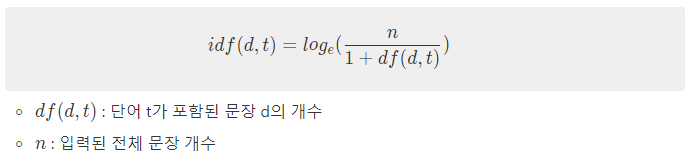
- 조건 3: 입력된 문장의 토큰화에는 문제 1에서 만든 Tokenizer를 사용합니다.
    
    

**2-2. `transform()`**

입력 문장들을 이용해 TF-IDF 행렬을 만드는 함수입니다.

- input: 여러 영어 문장이 포함된 list입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output : nested list 형태입니다.
    
    ex) [[tf-idf(1, 1), tf-idf(1, 2), tf-idf(1, 3)], [tf-idf(2, 1), tf-idf(2, 2), tf-idf(2, 3)]]
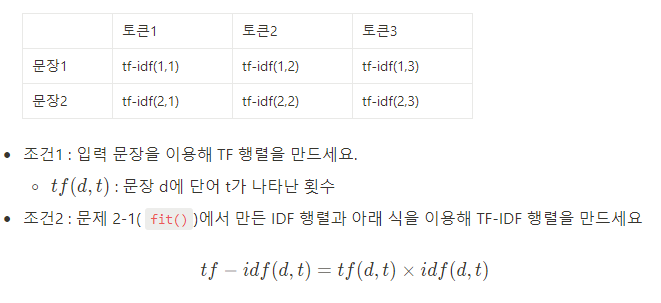

In [1]:
from math import log 

class TfidfVectorizer:
  def __init__(self, tokenizer):
    self.tokenizer = tokenizer
    self.fit_checker = False    

    '''
    fit
    1) 토큰화하여서 나온 nested list--> 1차원 리스트로 변경 ex) [1,2,3,4]
    2) df(d,f): 각각 토큰들이 문장마다 있는지 --> 있다면 +1 
    3) idf식에 대입한 값을 result에 추가    
    '''
  def fit(self, sequences):
    tokenized = self.tokenizer.fit_transform(sequences)
    self.IDF_Matrix = []
    self.ts =  list(set(sum(tokenized, []))) # 인덱싱된 정수(토큰)들을 중복제거 후 1차원 리스트로 
    n = len(tokenized) # 총 문서
    for i in range(len(self.ts)): 
      t = self.ts[i]
      df = 0
      for token in tokenized: # (2)
        df +=  t in token
      self.IDF_Matrix.append(log(n/(df+1))) #(3)
    self.fit_checker = True

    '''
    transform
    1)TF행렬 
    1-1) 각각 문장으로 구분
    1-2) output_type을 위한 []추가 
    1-3) 특정 문서안에 특정 토큰의 갯수 TF 행렬에 추가
        cf) TF_matrix[-1] --> [-1]하지 않을시 output type 에 맞출수 없음 ex) [[],0,[],1]
    2)TF-IDF행렬: tf(d,f) X idf(d,f)
    2-1) tf(d,f): 특정 문장에서 특정 문자가 갯수() 
        idf(d,f): self.IDF_Matrix[x]
    2-2) 위 결과를 TF-IDF 행렬 추가 
    '''
  def transform(self, sequences):
    if self.fit_checker:
       tokenized = self.tokenizer.transform(sequences)
       n =len(tokenized)
       self.tfidf_matrix =[]
        # TF_행렬
       TF_matrix = []
       for i in range(n):  
         TF_matrix.append([])       
         self.tfidf_matrix.append([])
         d = tokenized[i] #특정 문서
         for x in range(len(self.ts)): #self.ts : 전체 토큰이 있는 리스트
           t = self.ts[x]  # 특정 토큰 
           TF_matrix[-1].append(d.count(t)) 

          # TF-IDF 행렬
           tfidf= d.count(t) * self.IDF_Matrix[x] 
           self.tfidf_matrix[-1].append(tfidf)
       return self.tfidf_matrix
    else:
       raise Exception("TfidfVectorizer instance is not fitted yet.")

  
  def fit_transform(self, sequences):
    self.fit(sequences)
    return self.transform(sequences)

## 사용 권장 기술

- 사용 언어: Python (필수)
- 외부 라이브러리 사용은 자유이나, output의 type은 문제에 명시된 조건을 따라야 합니다.